## Introduction
This paper here is a Contains only the Visualizing process. You can see the whole data wrangling process on the wrangle_act paper.

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import seaborn as sns
import json
import pprint as pp
import re
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('twitter_archive_master.csv')


<a id='1'></a>
<font color=blue> First, let's see the relation between the number of retweets and rating
 </font>

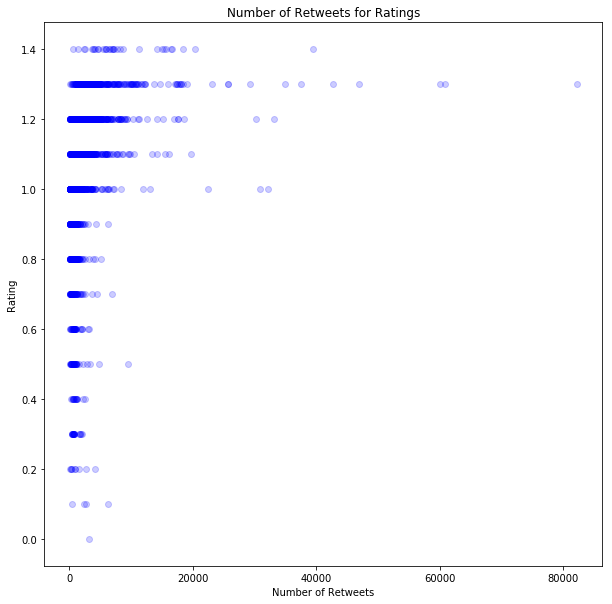

In [3]:
plt.figure(figsize=[10,10])
plt.scatter(x=df['retweets'], y=df['rating'], alpha=0.2, color='blue')
plt.xlabel('Number of Retweets')
plt.ylabel('Rating')
plt.title('Number of Retweets for Ratings');

<font color=red> Here, we can see that the higher the rating is the more retweets it gets
 </font>

<a id='2'></a>
<font color=blue> Now let's see the relation between the number of favorites and rating
 </font>

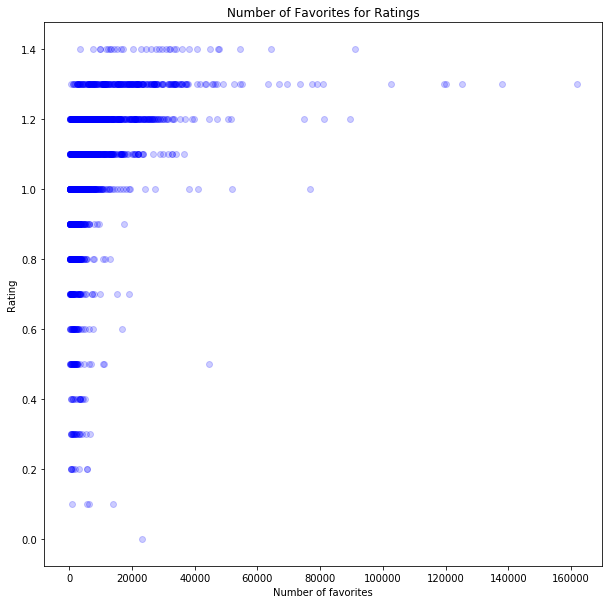

In [4]:
plt.figure(figsize=[10,10])
plt.scatter(x=df['favorites'], y=df['rating'], alpha=0.2, color='blue')
plt.xlabel('Number of favorites')
plt.ylabel('Rating')
plt.title('Number of Favorites for Ratings');

<font color=red> Here, we can see that the higher the rating is the more favorites it gets
 </font>

<a id='3'></a>
<font color=blue> Now let's see the relation between the number of favorites and the number of retweets
 </font>

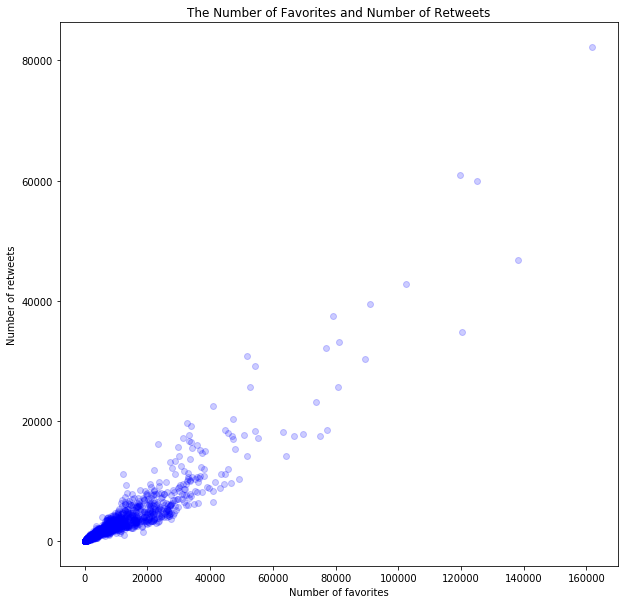

In [5]:
plt.figure(figsize=[10,10])
plt.scatter(x=df['favorites'], y=df['retweets'], alpha=0.2, color='blue')
plt.xlabel('Number of favorites')
plt.ylabel('Number of retweets')
plt.title('The Number of Favorites and Number of Retweets');

<font color=red> Here, we can see that there is a positive relationship between the number of favorites and the number of retweets, the more retweets it gets the more favorites it gets
 </font>

<a id='4'></a>

<font color=blue> Now let's see the rating over time
 </font>

C:\Users\abmalessa\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


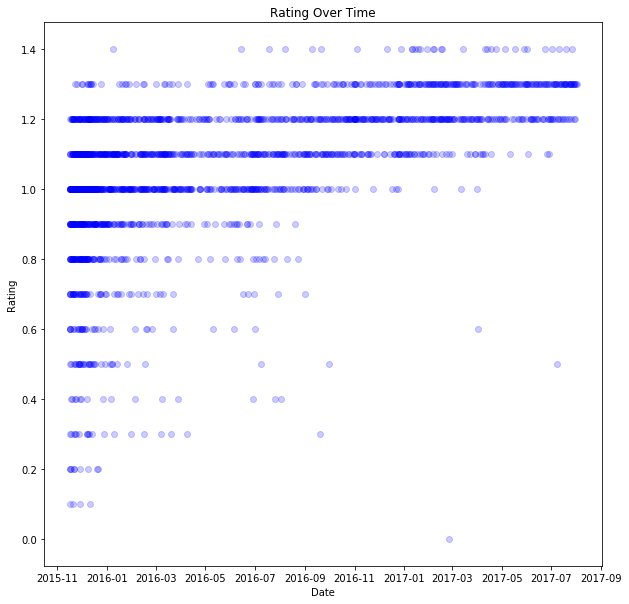

In [6]:
plt.figure(figsize=[10,10])
plt.scatter(x=pd.to_datetime(df.timestamp), y=df['rating'], alpha=0.2, color='blue')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.title('Rating Over Time');

<font color=red> Here, I couldn't find any obvious relations
 </font>

<a id='5'></a>

<font color=blue> Now let's see the average rating for each dog breed
 </font>

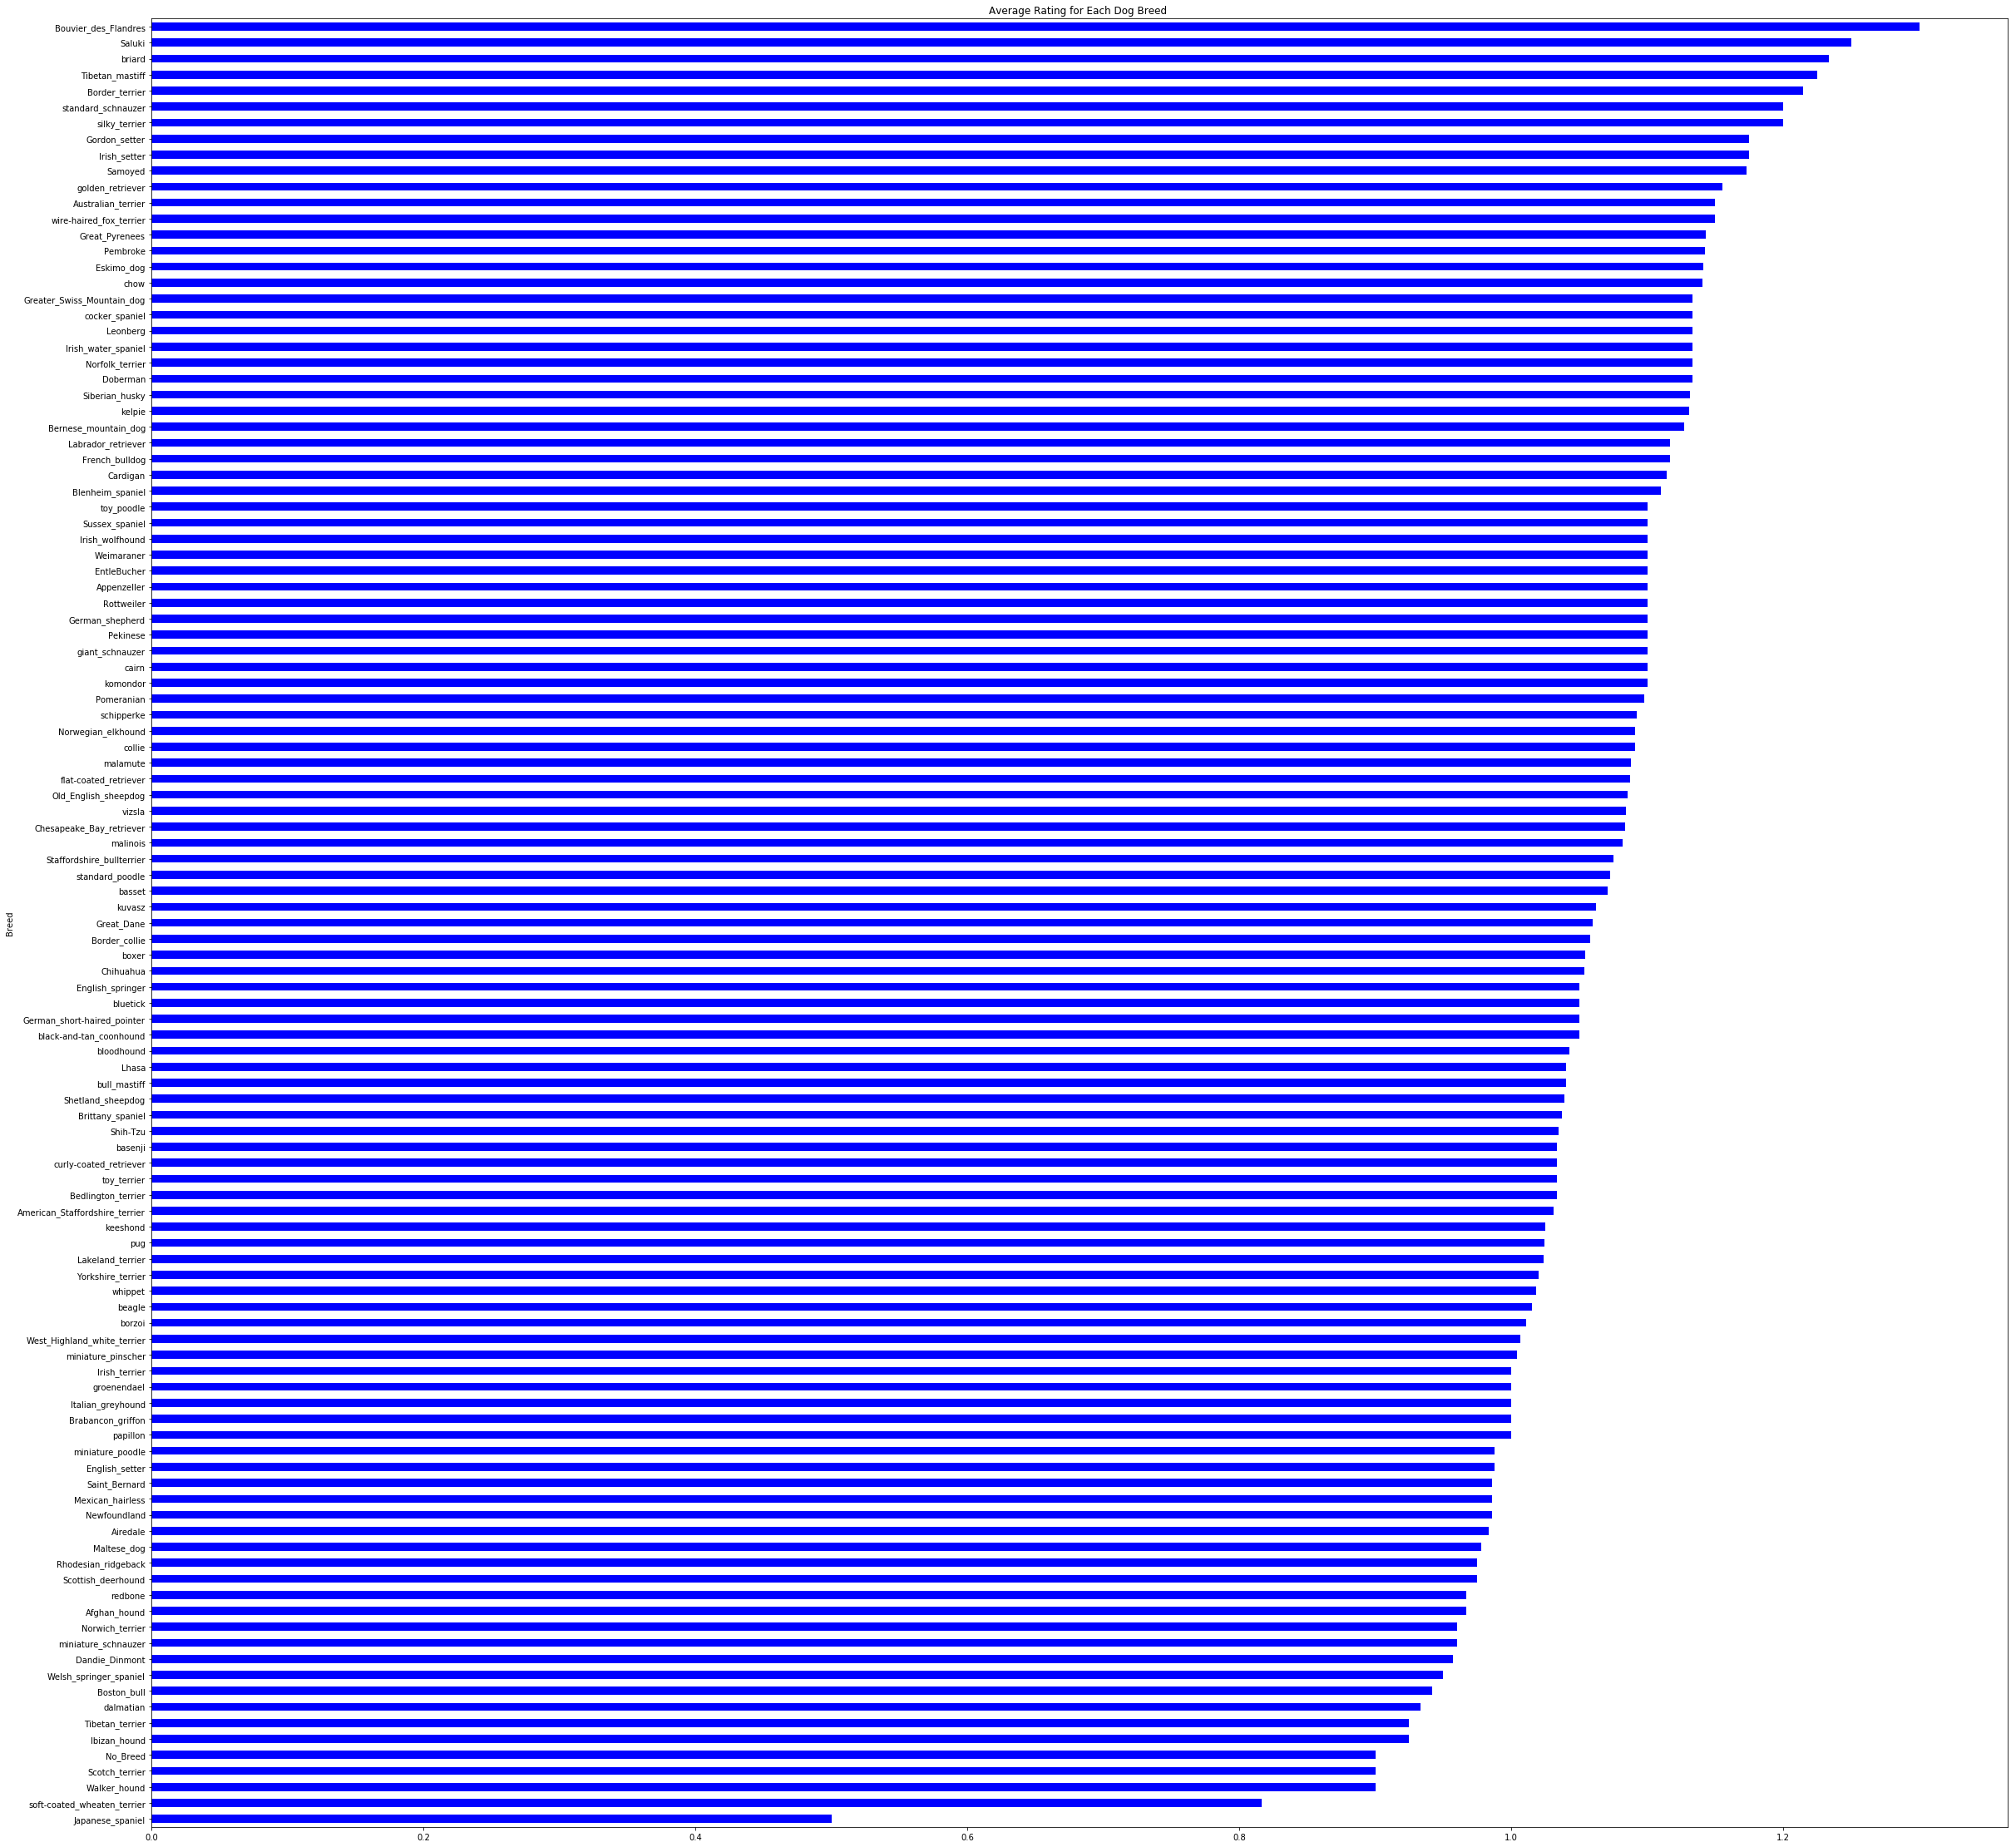

In [7]:
BreedMean = df.groupby('Breed').mean().sort_values('rating',ascending=True)

BreedMean['rating'].plot.barh(stacked=False, title = 'Average Rating for Each Dog Breed ',color='Blue', figsize=(40, 40));

<font color=red> Here, we can see that Bouvier des flandres is the highest rated breed
 </font>

<a id='6'></a>

<font color=blue> Now let's see the highest breed in number in this data set
 </font>

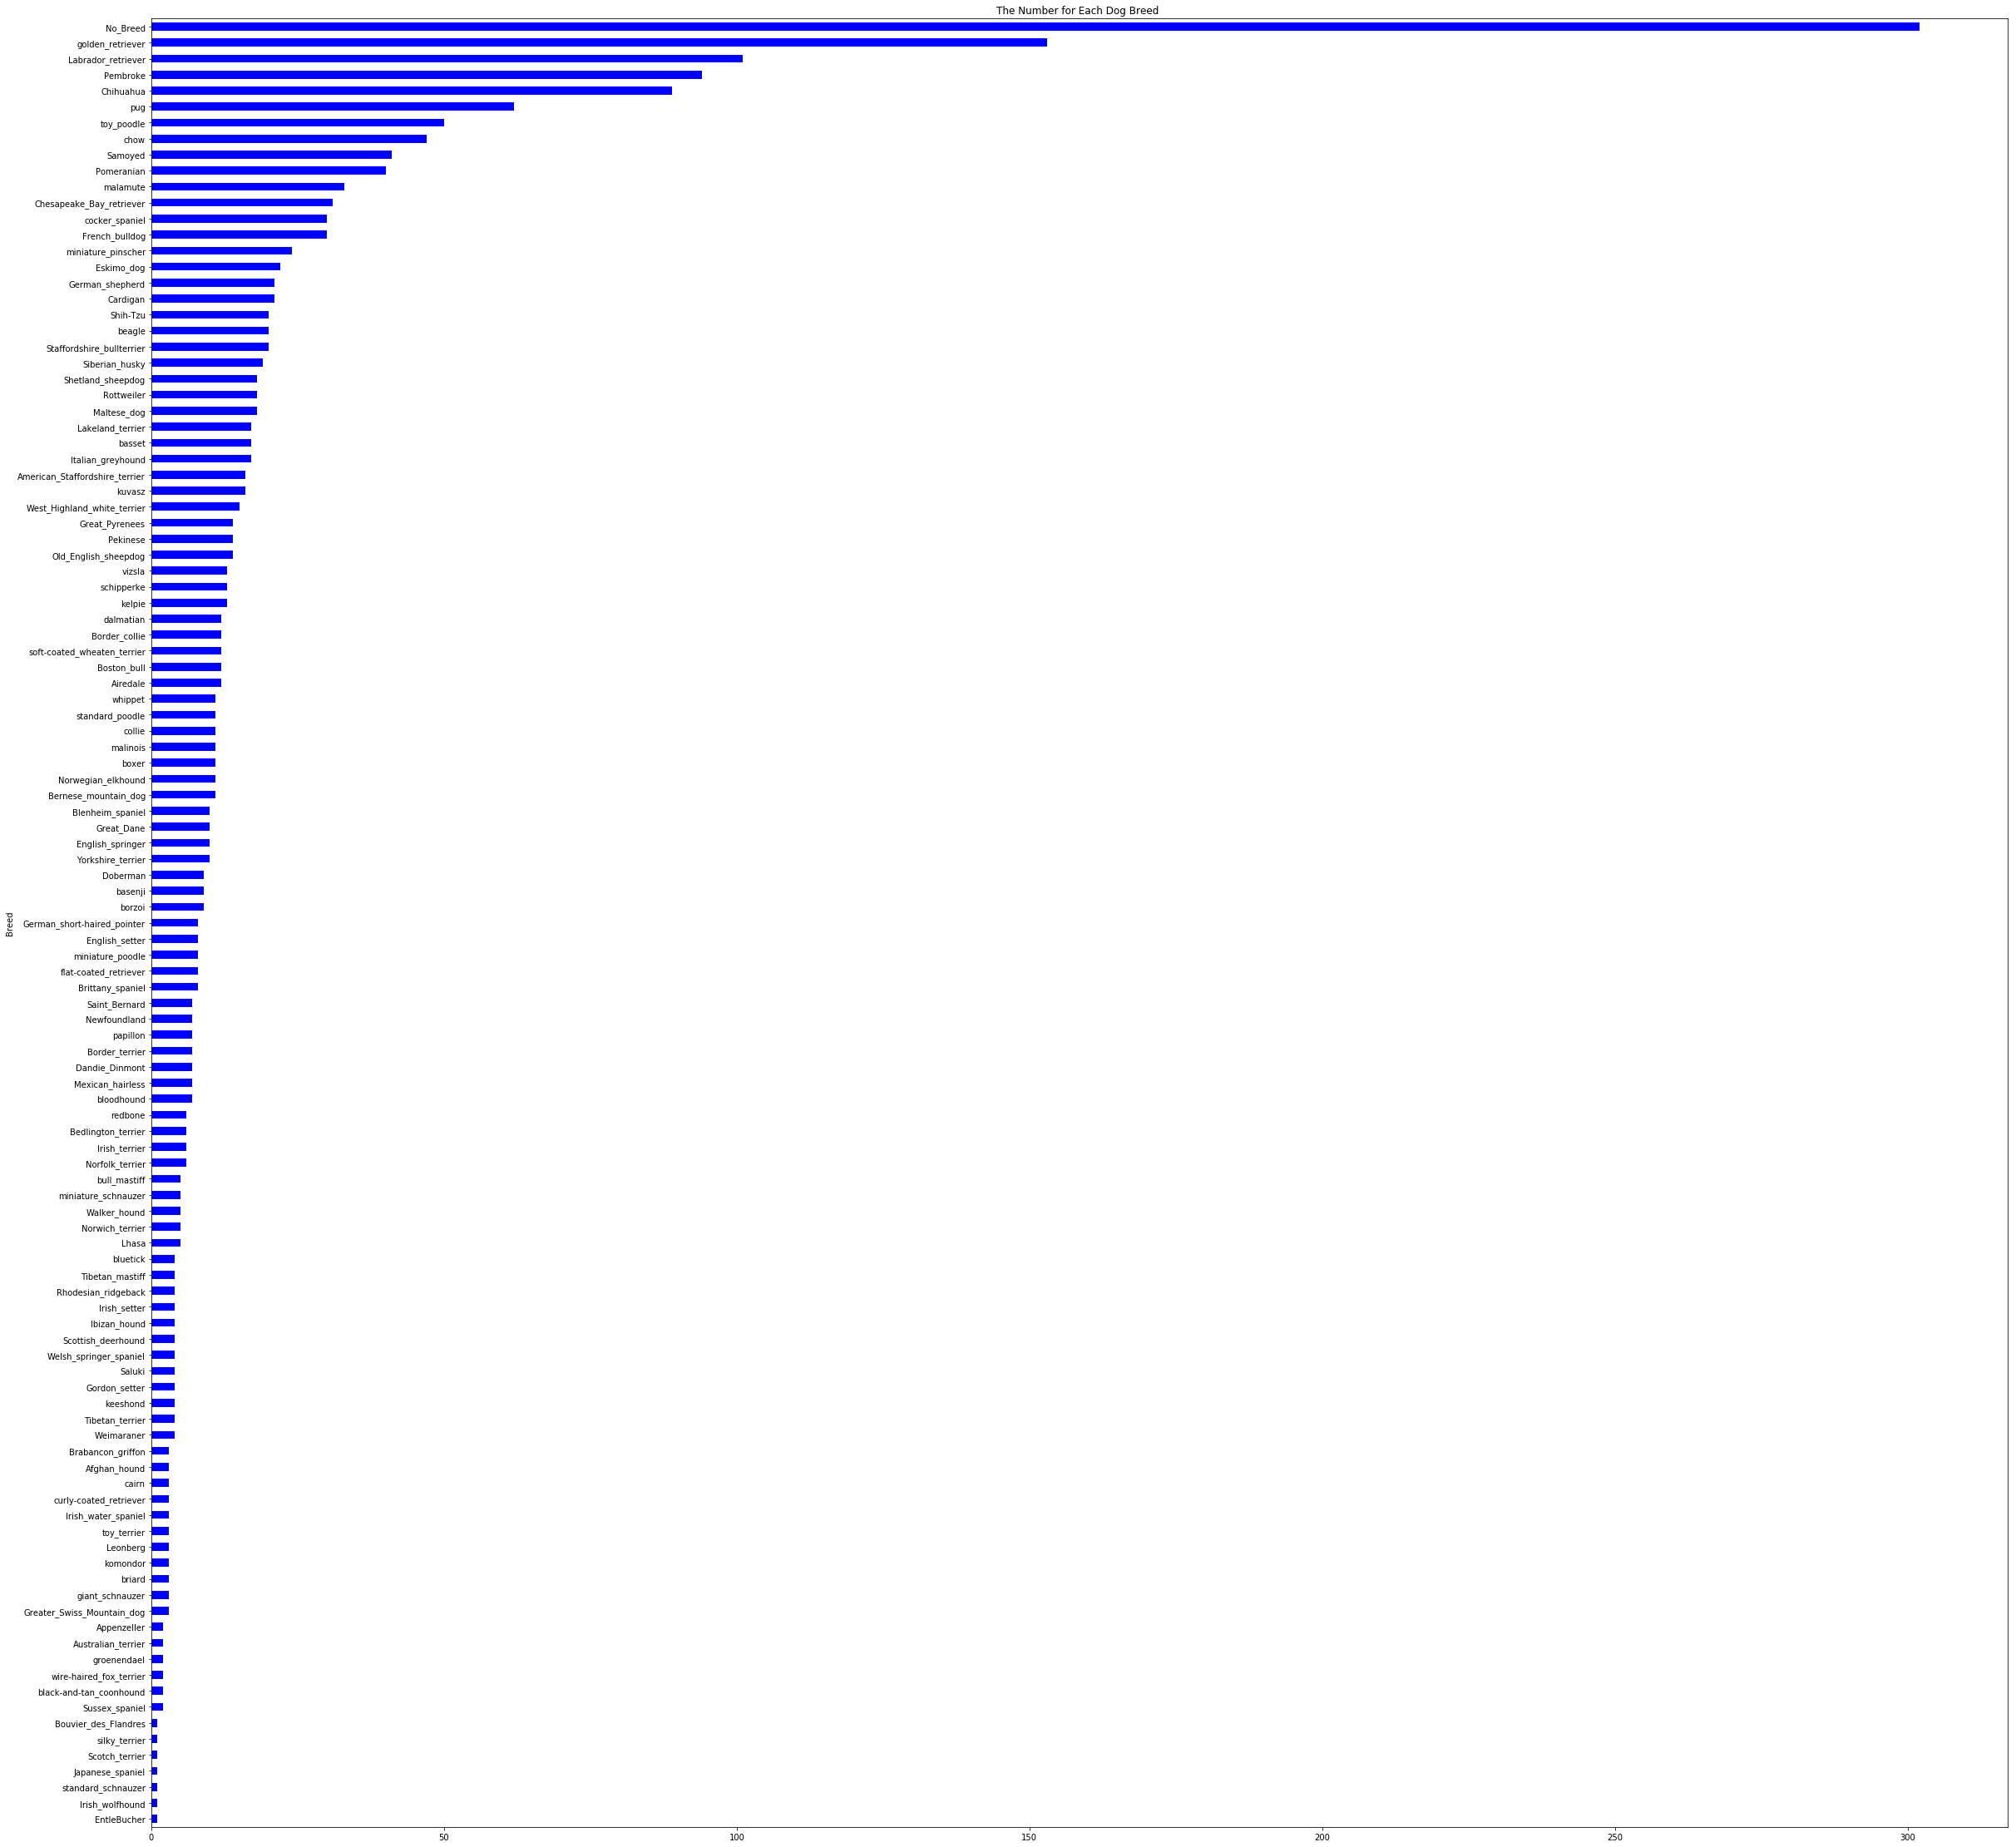

In [34]:
BreedCount = df.groupby('Breed').tweet_id.nunique().sort_values(ascending=True)
BreedCount.plot.barh(stacked=False, title = 'The Number for Each Dog Breed ',color='Blue', figsize=(40, 40));


<font color=red>  Here, we can see that Golden retriever has the highest number of dogs
 </font>

<a id='7'></a>


<font color=blue> Now let's see the average rating for each dog stage
 </font>

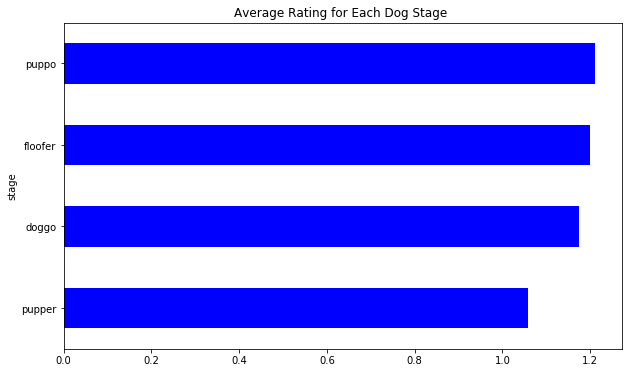

In [9]:
StageMean = df.groupby('stage').mean().sort_values('rating',ascending=True)

StageMean['rating'].plot.barh(stacked=False, title = 'Average Rating for Each Dog Stage ',color='Blue', figsize=(10, 6));



<font color=red> Here, we can see that puppo is the highest rated stage
 </font>

<a id='8'></a>

<font color=blue> Now let's see the highest stage in number in this data set
 </font>

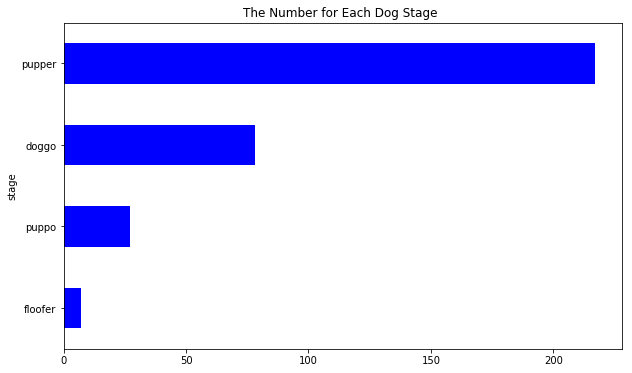

In [10]:
StageCount = df.groupby('stage').tweet_id.nunique().sort_values(ascending=True)
StageCount.plot.barh(stacked=False, title = 'The Number for Each Dog Stage ',color='Blue', figsize=(10, 6));

<font color=red>  Here, we can see that pupper has the highest number of dogs
 </font>

## Our Findings

Here we will recap what we found in the above figures.

1- From the [first figure](#1), we can clearly see that the tweets that has a higher rating get a high number of retweets

2- Similarly to the first figure, we can see in the [second figure](#2) that the higher the rating is the more favorite it 
gets.

3- In the [third figure](#3), we can see that the higher the favorite is the higher retweets it gets. This makes sense, since we found in the first two figures that high retweets and favorite means high rating. So it is not a surprise that when one goes up the other also go up.

4- In the [forth figure](#4), I was not sure what I'm going to find or what I should find. However, the only thing that I Found was that the account tweets most of the time with a high rating (10 of 10 or more). The rating (12 of 10) seems to be a regular tweet.

5- From the [fifth figure](#5), we found that Bouvier des flandres is the highest rated breed with about (13 out of 10) as an average rating. That could be because there is not a lot of Bouvier des flandres in this data set (Only one)

6- From the [sixth figure](#6), we can see that Golden retriever is the most common dog breed with more than 150 tweets. Golden retriever is also the 11th in the highest rated dog breed.

7- In the [seventh figure](#7), we found that puppo is the highest rated dog stage with almost 12 out of 10. We also found in the next figure the puppo stage has less than 50 tweets.

8- In the [eighth figure](#8), we found that pupper has the highest number of tweets. And from the previous figure, we also found that pupper has a rating of about 10.5 out of 10. This makes it the lowes rated stage.